<a href="https://colab.research.google.com/github/shreyash26cho/ML/blob/main/spam_filltering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score



from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# 1. Load dataset
df = pd.read_csv("/content/spam.csv", encoding='latin-1')
print(df.columns) # Print column names for debugging
df = df[['Category', 'Message']]
df.columns = ['label', 'text']

# Convert labels to binary
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# 2. Preprocessing function using NLTK
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = "".join([ch for ch in text if ch not in string.punctuation])
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords & apply stemming
    tokens = [ps.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['text'] = df['text'].apply(preprocess)

# 3. TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['label']

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Model Training
model = MultinomialNB()
model.fit(X_train, y_train)

# 6. Predictions & Evaluation
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Index(['Category', 'Message'], dtype='object')
✅ Accuracy: 0.9641255605381166
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.99      0.74      0.85       149

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.96      0.96      1115



Coefficients: [[1.99805182]]
Intercept: [1.20634019]


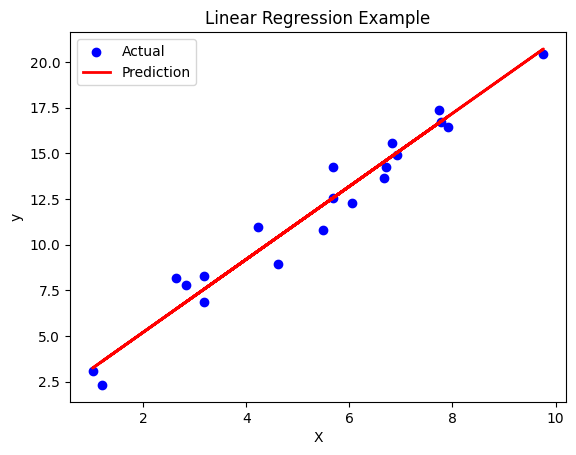

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate some random data for demonstration
np.random.seed(0)
X = np.random.rand(100, 1) * 10 # Generate 100 random numbers between 0 and 10
y = 2 * X + 1 + np.random.randn(100, 1) # Generate y with a linear relationship and some noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Plot the original data and the linear regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Example')
plt.legend()
plt.show()